In [32]:
# 1️⃣ Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import plotly.express as px

In [3]:
df = pd.read_csv('/content/owid-covid-data.csv')

In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772.0,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum().head(15)

,0
iso_code,0
continent,21828
location,1
date,1
total_cases,15084
new_cases,16285
new_cases_smoothed,17405
total_deaths,15084
new_deaths,16280
new_deaths_smoothed,17400


In [8]:
# Data Cleaning
# ---------------------------------------------------------

# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

In [9]:
# Select relevant columns
columns = ["date","location","total_cases","new_cases","total_deaths","new_deaths","total_vaccinations","people_vaccinated","people_fully_vaccinated"]
df = df[columns]

In [10]:
# Fill numeric columns with 0
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389142 entries, 0 to 389141
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     389142 non-null  object 
 1   location                 389142 non-null  object 
 2   total_cases              389142 non-null  float64
 3   new_cases                389142 non-null  float64
 4   total_deaths             389142 non-null  float64
 5   new_deaths               389142 non-null  float64
 6   total_vaccinations       389142 non-null  float64
 7   people_vaccinated        389142 non-null  float64
 8   people_fully_vaccinated  389142 non-null  float64
dtypes: float64(7), object(2)
memory usage: 26.7+ MB


In [13]:
# Exploratory Data Analysis (EDA)
# ---------------------------------------------------------

# Example countries of interest
countries = ["Kenya", "United States", "India"]

In [14]:
df_countries = df[df["location"].isin(countries)]

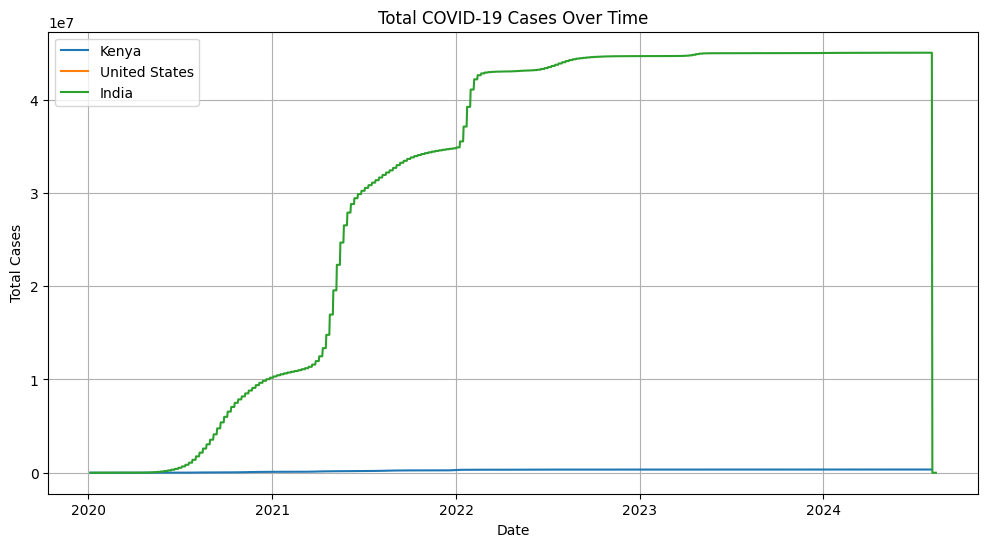

In [16]:
# Total Cases Over Time
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_countries[df_countries["location"] == country]
    plt.plot(country_data["date"], country_data["total_cases"], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.show()

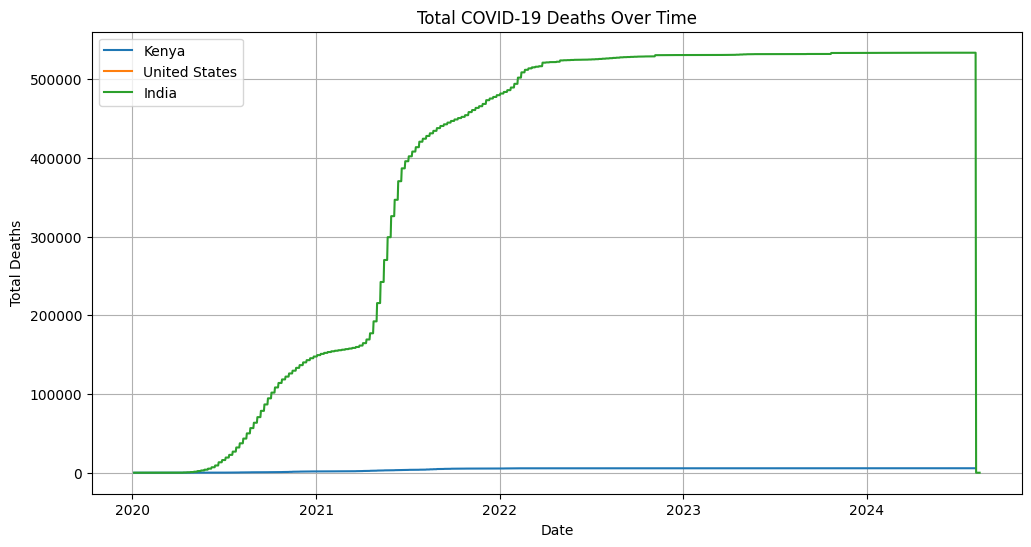

In [18]:
# Total Deaths Over Time
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_countries[df_countries["location"] == country]
    plt.plot(country_data["date"], country_data["total_deaths"], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Daily New Cases (comparison)
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_countries[df_countries["location"] == country]
    plt.plot(country_data["date"], country_data["new_cases"], label=country)
plt.title("Daily New Cases Comparison")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-2543951778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries["death_rate"] = df_countries["total_deaths"] / df_countries["total_cases"]


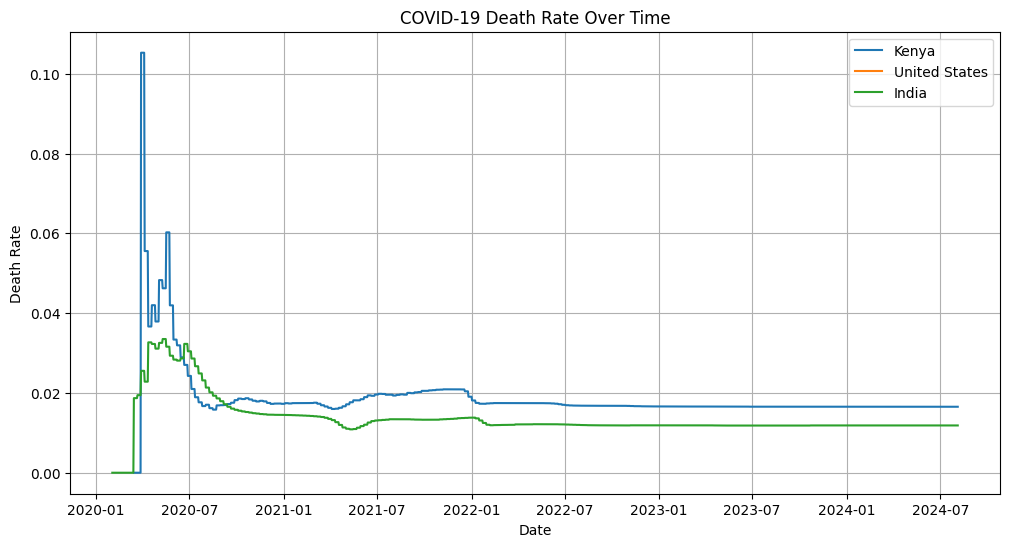

In [20]:
#Death Rate
df_countries.loc[:, "death_rate"] = df_countries["total_deaths"] / df_countries["total_cases"]
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_countries[df_countries["location"] == country]
    plt.plot(country_data["date"], country_data["death_rate"], label=country)
plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend()
plt.grid(True)
plt.show()

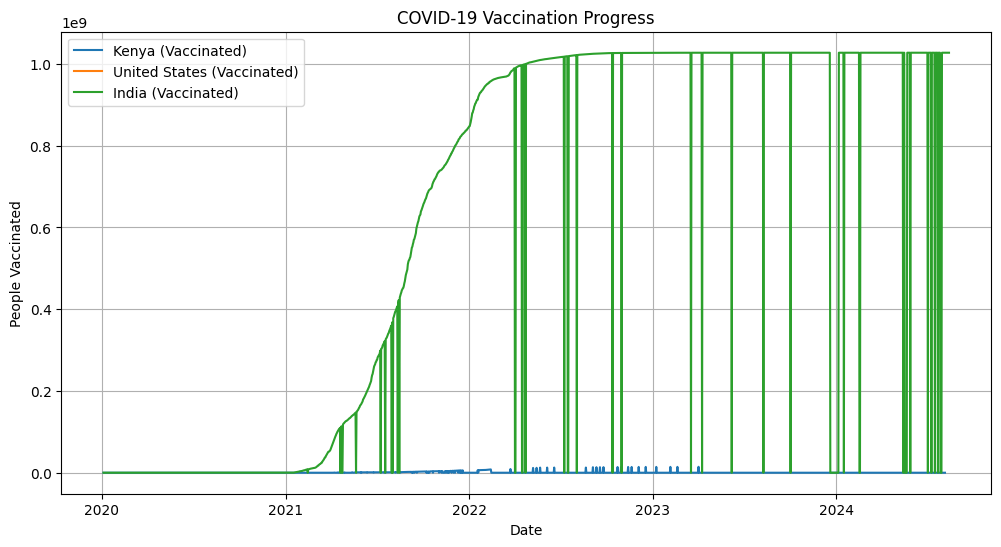

In [21]:
#Vaccination Progress
# ---------------------------------------------------------

plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_countries[df_countries["location"] == country]
    plt.plot(country_data["date"], country_data["people_vaccinated"], label=f"{country} (Vaccinated)")
plt.title("COVID-19 Vaccination Progress")
plt.xlabel("Date")
plt.ylabel("People Vaccinated")
plt.legend()
plt.grid(True)
plt.show()

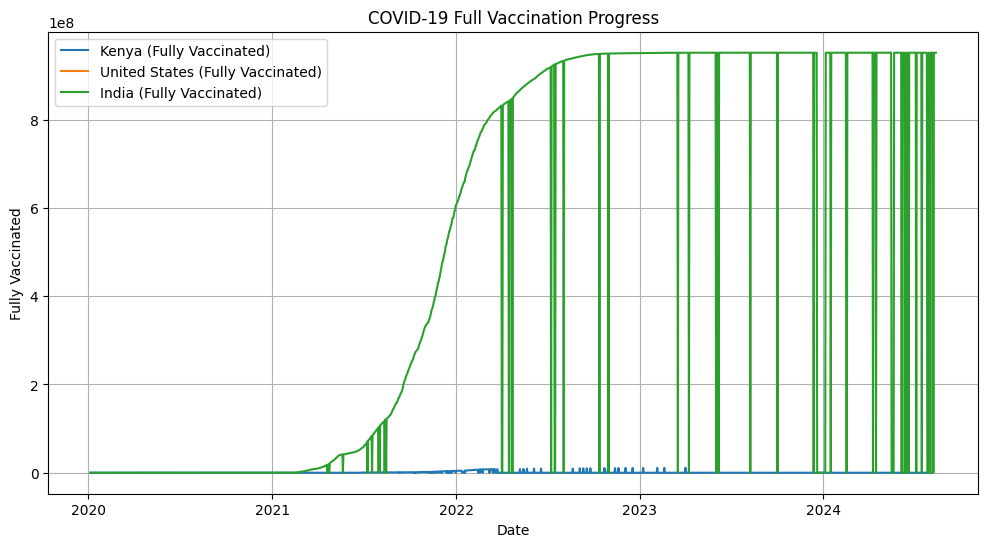

In [22]:
# % Fully Vaccinated
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_countries[df_countries["location"] == country]
    plt.plot(country_data["date"], country_data["people_fully_vaccinated"], label=f"{country} (Fully Vaccinated)")
plt.title("COVID-19 Full Vaccination Progress")
plt.xlabel("Date")
plt.ylabel("Fully Vaccinated")
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# 🌍 Choropleth Map for COVID-19 Global Data
# -------------------------------------------

import pandas as pd
import plotly.express as px
from google.colab import files

In [36]:
df = pd.read_csv('/content/owid-covid-data.csv')

In [37]:
# Step 3: Clean and prepare data
df["date"] = pd.to_datetime(df["date"])

In [38]:
# Get the latest date available in the dataset
latest_date = df["date"].max()
print("📅 Latest date in dataset:", latest_date)

📅 Latest date in dataset: 2024-08-14 00:00:00


In [39]:
# Filter dataset for latest date
latest_data = df[df["date"] == latest_date]

In [40]:
# Step 4: Create a Choropleth map (e.g., total cases)
fig_cases = px.choropleth(
    latest_data,
    locations="iso_code",                # ISO country codes
    color="total_cases",                 # Color by total cases
    hover_name="location",               # Country name on hover
    color_continuous_scale="Reds",       # Color scale
    title=f"🌍 COVID-19 Total Cases by Country ({latest_date.date()})"
)
fig_cases.show()


In [41]:
# Step 5: Choropleth map for Vaccinations
fig_vax = px.choropleth(
    latest_data,
    locations="iso_code",
    color="people_fully_vaccinated",     # Fully vaccinated people
    hover_name="location",
    color_continuous_scale="Greens",
    title=f"🌍 COVID-19 Fully Vaccinated People by Country ({latest_date.date()})"
)
fig_vax.show()